## **<I>[ 이화여대 주변의 음식점 데이터 시각화_시연용 ]</i>**
5가지 모드로 이화여자대학교 주변 음식점 데이터를 시각화해줍니다.

In [ ]:
#폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,839 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
#기본 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import os.path
from google.colab import drive

#드라이브 마운트
drive.mount('/content/gdrive/')
data_path = '/content/gdrive/MyDrive/파데분플젝/최종/데이터/'

Mounted at /content/gdrive/


## **<I>[ 5가지 프로그램 함수 정의]</i>**

### **1. <i>'음식점 위치, 리뷰 평점, 도로명 주소'</i> 데이터 시각화**

folium 라이브러리를 활용해 음식점 위치를 아이콘으로 시각화하여 사용자에게 보여줍니다.  
사용자가 행정동명을 검색하면 해당 행정동명에 위치한 음식점을 사용자에 선택에 따라 2가지 모드(전체 뷰 모드, 검색 모드)로 보여줍니다.  

전체 뷰 모드에서는 선택한 행정동명의 전체 음식점 분포를 확인 가능합니다.

검색 모드에서는 원하는 음식점의 현재 나와의 거리와 주소를 확인할 수 있습니다.

#### **<i>[라이브러리 설명]</i>**

**1) folium library**  : 지도를 활용한 위치 시각화 라이브러리  
**<i>-Marker</i>** :마커를 설정해줍니다    
**<i>-MarkerCluster</i>** : 마커들을 묶음으로 보여줍니다.


**2) geopy library**: 장소의 주소, 위도, 경도, 고도, 거리 계산 등의 기능을 쉽게 이용할 수 있게 한 라이브러리  
**<i>-geodesic()</i>**: 지구에서 두 장소 사이 가장 짧은 거리를 계산해줍니다

In [ ]:
#!pip install folium
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic

def program_1():
  data_path = '/content/gdrive/MyDrive/파데분플젝/최종/데이터/'
  df = pd.read_csv(data_path + 'final_all.csv', encoding = "utf-8")
  dong = sorted(set(list((df['행정동명']))))
  print('서대문구의 행정동명은 다음과 같습니다 : \n', dong)
  print()
  region = input('원하는 행정동명을 입력하세요: \n')
  print()


  df = df.loc[df['행정동명'] == region]
  mode_1 = int(input('모드를 골라주세요: 1 - 해당 동 전체 뷰 모드, 2 - 음식점 검색 모드: '))
  if mode_1 == 1:
    
      lat = df['위도'].mean()
      long = df['경도'].mean()
      m1 = folium.Map(location = [lat, long], zoom_start = 10, width='70%', height='70%', position='relative')
      marker_cluster=MarkerCluster().add_to(m1)
      for i in df.index:
        sub_lat = df.loc[i,'위도']
        sub_long = df.loc[i,'경도']

    #Marker기능으로 tooltip, icon, popup을 지정하여 시각화 효과를 높이고 주소, 나와의 거리를 제공합니다                
    #color: 마커의 색깔  
    #icon: icon종류  
    #tooltip: 마우스 커서를 마커에 올렸을 때 뜨는 문구  
    #popup: 마우스로 마커를 클릭했을때 뜨는 문구 
        folium.Marker([sub_lat, sub_long],
                      icon = folium.Icon(color='orange', icon = 'glyphicon-cutlery'),
                      tooltip = '<i><b>\'' + str(df.loc[i,'상호명']) + '\'</b></i>').add_to(marker_cluster)
      print('____________________________________________________')
      print('1번: 해당 동 전체 뷰 모드로 설정되었습니다.')
      print()
      print(region + '의 음식점 분포입니다')
      display(m1)
      folium.Map().get_root().render()

        
  elif mode_1 == 2: #검색 모드의 경우, 나의 위치와 음식점을 입력해 원하는 음식점과의 거리를 알 수 있습니다

        print('____________________________________________________')
        print('2번: 검색 모드로 설정되었습니다')
        print()
        print('음식점과 나의 위치 사이 거리 정보를 제공하기 위해 위치 입력이 필요합니다')
        print('나의 위치를 입력해주세요: ')
        print()

        #나의 현재 위치를 위도와 경도 좌표로 입력합니다
        my_lat = float(input('위도를 입력해주세요(-90~90): \n')) 
        my_long = float(input('경도를 입력해주세요(-180~180): \n')) 
        print()
        my_location = (my_lat, my_long)

        #검색하고자 하는 음식점 이름을 입력합니다
        store = input("주소와 나와의 거리를 알고 싶은 음식점 이름을 입력하세요(키워드 검색): \n")

        #입력한 음식점의 위도, 경도 좌표를 저장합니다
        shop_list = df['상호명'].values.tolist() 
        stores = []
        for shop in shop_list:
          if store in shop:
            stores.append(shop)
        if len(stores) == 0:
          print("입력하신 키워드 {}(이)가 들어간 식당을 찾을 수 없습니다.".format(store))
          pass
    
        dic = dict(zip(np.arange(len(stores)),stores))
        print("검색하신 키워드에 맞는 식당 목록입니다.")
        print(dic)
        num = int(input("목록 중 원하시는 식당 번호를 입력해주세요: \n"))
        #print(dic.values)
        i = df[df['상호명'] == dic[num]].index.values
        i = int(i[0])

        store_location = (df['위도'][i],df['경도'][i])
        
        #geodesic함수를 사용해 내 위치와, 입력한 동에 있는 모든 음식점 사이의 거리를 계산합니다
        df['distance']=df.apply(lambda x:geodesic((x['위도'],x['경도']),my_location),axis=1) #axis=1을 통해 열 방향으로 거리 계산을 수행하고, 그 결과를 df에 'distance' column으로 저장합니다
        m2=folium.Map(location = [(store_location[0] + my_location[0]) / 2, (store_location[1] + my_location[1]) / 2], zoom_start=10,  width = '70', height = '70',position='relative')
  

        #Marker기능으로 tooltip, icon, popup을 지정하여 시각화 효과를 높이고 주소, 나와의 거리를 제공합니다
        folium.Marker(store_location, tooltip= '<b><i>'+str(df['상호명'][i])+'</b></i>',
                      icon=folium.Icon(color='blue', icon='search'),
                      popup='<i>\'도로명주소\'</i>' + '<br/>' + df['도로명주소'][i] +  '<br/>'*2 + 
                      '<i>\'별점\'</i>' + '<br/>' + str(df['naver_visitor_review_rate'][i])
                      + '<br/>'* 2  + '<i>\'나와의 거리\'</i>' + '<br/>' + str(df['distance'][i])).add_to(m2)

        folium.Marker(my_location, tooltip = '<i><b>\'나의 위치\'</b></i>', icon = folium.Icon(color = 'red', icon = 'user')).add_to(m2)
        print('<',dic[num],'>의 주소, 거리에 대한 정보입니다.')

        
        #시각화가 완성된 지도를 보여줍니다
        display(m2)
        folium.Map().get_root().render()  

### **2. <i>'영업시간, 배달 여부'</i> 데이터 시각화**

matplotlib.pyplot 라이브러리를 활용해 영업 시간을 시각화해주고, 배달 가능 여부를 알려줍니다.

가게의 영업 시간과 배달 여부를 사용자가 원하는 하에 연속적으로 확인할 수 있습니다. 
#### **<i>[라이브러리 설명]</i>**

**-itertools library**  : 효율적인 looping을 위한 iterator를 만드는 라이브러리

**<i>-Repeat</i>**

-list(repeat(object, n)): object를 n번 반복해서 하나로 묶어 줍니다

In [ ]:
    import itertools
    from itertools import repeat

    def program_2():
      data_path = '/content/gdrive/MyDrive/파데분플젝/최종/데이터/'
      dfm = pd.read_csv(data_path + 'final_all.csv', encoding = "utf-8")
      dong = sorted(set(list((dfm['행정동명']))))
      print('서대문구의 행정동명은 다음과 같습니다 : \n', dong)
      print()
      name = input("원하는 행정동명을 입력하세요 : \n") 
      print()
      df=  pd.read_csv(data_path +'영업시간,배달 crawling data/' +name +'_result.csv')
    #while 무한루프 안에서 사용자가 프로그램 종료를 입력할 때까지 영업 시간과 배달 시간 정보를 알 수 있습니다
      print()
      store=input("영업시간과 배달 가능 여부를 알고 싶은 가게 이름을 입력하세요(키워드 검색): \n") #음식점의 이름을 입력받습니다
      shop_list = df['상호명'].values.tolist() 
      stores = []
      for shop in shop_list:
        if store in shop:
          stores.append(shop)
      if len(stores) == 0:
        print("입력하신 키워드 {}(이)가 들어간 식당을 찾을 수 없습니다.".format(store))
        pass
      dic = dict(zip(np.arange(len(stores)),stores))
      print("검색하신 키워드에 맞는 식당 목록입니다.")
      print(dic)
      num = int(input("목록 중 원하시는 식당 번호를 입력해주세요: \n"))
      print(dic.values)
      i = df[df['상호명'] == dic[num]].index.values
      i = int(i[0])        
      start_arr=str(df['office_hour_start'][i]) #영업 시작 시간을 문자열 형태로 저장합니다
      end_arr=str(df['office_hour_end'][i]) #영업 종료 시간을 문자열 형태로 저장합니다
      
      if ':' in start_arr and ':' in end_arr: #네이버 플레이스에 영업 시작 시간과 영업 종료 시간이 모두 정상적으로 표시(00:00 형태)됐을 경우 영업 시간을 시각화합니다
          start=int(df['office_hour_start'][i][:2]) #영업 시작 시간의 '시:분' 중 '시' 부분
          end=int(df['office_hour_end'][i][:2]) #영업 종료 시간의 '시:분' 중 '시' 부분
          x=np.arange(start,end+1) #영업 시간이 몇시부터 몇시인지 np.arange()로 담아둡니다
          y=list(repeat(1,len(x))) #영업 시간에 해당하는 시간은 1을 값으로 가지도록
          df_=pd.DataFrame(y,x,columns=['영업 중'])
          df_.index = df_.index.map(int)
          plt.style.use('ggplot')
          plt.rc('font', family='NanumBarunGothic')
          #x,y로 만든 dataframe에 plot을 적용합니다
          df_.plot(kind='area',stacked=False,alpha=0.2,figsize=(14,0.7),xticks=np.arange(0,25),yticks=np.arange(2,3)) #kind='area'를 통해 영업시간에 해당되면 해당 영역에 색으로 표시를 합니다
          plt.title('<'+df['상호명'][i]+'>'+"의 영업시간: "+df['office_hour_start'][i]+'~'+df['office_hour_end'][i]) 
          plt.xlabel('00:00a.m.~24:00p.m.',size=10)
          plt.ylabel('영업',size=10)
          plt.show()
      
      else: #네이버 플레이스에 영업시간이 정상적으로 표시되지 않은 경우('휴무' 표시 또는 표시되어 있지 않음 등) 표시되지 않았다는 문구를 보여줍니다
          print()
          print('❗'+'<'+df['상호명'][i]+">은 영업시간이 표시되어 있지 않은 가게입니다"+'❗')
      print()
      print('   배달 가능 여부')
      
      if df['delivery_bool'][i]=='Yes': #df에 저장해 놨던 배달 가능 여부가 yes일 경우 배달 가능이라고 표시
          print('🛵'+'<'+df['상호명'][i]+">은 배달 가능한 가게입니다")
          print('______________________________________________________________________________________________________________________')
      
      else:
          print('❗'+'<'+df['상호명'][i]+">은 배달이 불가능하거나 배달 여부가 표시되어 있지 않은 가게입니다"+'❗')
          print('______________________________________________________________________________________________________________________')

### **3. <i>'최다리뷰수, 최고리뷰평점의 음식점'</i> 데이터 시각화**

크롤링한 데이터 기반 음식점 요일별 방문자수, 최다리뷰수, 최고리뷰평점의 음식점 정보를 그래프(히트맵, 히스토그램)로 시각화하여 보여줍니다.

#### **<i>[라이브러리 설명]</i>**

**-seaborn library**  : Matplotlib 기반 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.   


In [ ]:
import platform
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

#한글깨지는 문제
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

def program_3():

  print('모드를 골라주세요')
  mode_3 = int(input('1 - 음식점 요일별 방문자수 뷰 모드, 2 - 우수 음식점 검색 모드: '))

  if mode_3 == 1:
      print('1번: 음식점 요일별 방문자수 뷰 모드로 설정되었습니다.')
      print()
      data = pd.read_csv(data_path + '음식점방문수.csv')
      name = input("요일별로 방문자수를 시각화하길 원하는 식당의 이름을 입력해주세요(키워드 검색) : \n")          #원하는 음식점명을 입력하면 음식점의 요일별 방문자수를 heatmap으로 시각화하기
      ii=data.index[data['PLC_NM'].str.contains(name)].tolist() #가게의 이름을 다 기억하지 못해 일부만 입력하더라도 작동하도록 합니다
      i=ii[0]
      store=data['PLC_NM'][i]
      data.rename(columns = {'DAY_CD' : 'DAY'}, inplace = True)     #요일 column명 변경하기
      data.rename(columns = {'VST_CT' : 'NUMBER'}, inplace = True)  #방문자수 column명 변경하기
      data.rename(columns = {'PLC_NM' : 'NAME'}, inplace = True)    #음식점명 column명 변경하기
      data.drop(['LOG_DATE','SKSN_CGR_LCLS_NM','SKSN_CGR_LCLS_CD','SKSN_CGR_SCLS_NM','SKSN_CGR_SCLS_CD'], axis='columns', inplace=True)  #필요없는 column 제거하기
      data.sort_values('NAME', ascending=True).head()
      data = data.pivot_table(index = 'NAME', columns = 'DAY', values = 'NUMBER', aggfunc = 'sum')  #요일에 따른 방문자수 데이터를 가져와 피벗테이블 제작하기
      data = data.fillna(0)   #Nan값을 0으로 대체
      a = data.index.str.contains(name)                             #원하는 음식점의 요일별 방문자수 데이터만 가져오기
      df1 = data[a]                                                 #24시국수회관으로 검색해주세요.
      df1 = df1.reset_index()
      df1.rename(columns = {1 : 'Monday'}, inplace = True)          #숫자에서 명칭으로 요일 나타내기
      df1.rename(columns = {2 : 'Tuesday'}, inplace = True)
      df1.rename(columns = {3 : 'Wednesday'}, inplace = True)
      df1.rename(columns = {4 : 'Thursday'}, inplace = True)
      df1.rename(columns = {5 : 'Friday'}, inplace = True)
      df1.rename(columns = {6 : 'Saturday'}, inplace = True)
      df1.rename(columns = {7 : 'Sunday'}, inplace = True)
      del df1['NAME']
      sns.heatmap(df1, annot=True, cmap="YlGnBu")                   #heatmap으로 시각화하기
      print()
      print('<'+store+'>의 요일별 방문자수를 시각화합니다.')
      plt.title('Store visualization', fontsize=20)                 #heatmap title 설정하기
      plt.xlabel('Day', fontsize=14)                                #heatmap x축 설정하기
      plt.ylabel('The number of visits', fontsize=14)               #heatmap y축 설정하기
      plt.show()
      
  elif mode_3==2: 
      print('2번: 서대문구 우수 음식점 검색 모드로 설정되었습니다.')
      print()
      df = pd.read_csv(data_path + '/final_all.csv', encoding = "utf-8")
      dong = sorted(set(list((df['행정동명']))))
      print('서대문구의 행정동명은 다음과 같습니다 : \n', dong)
      print()
      region = input('원하는 행정동명을 입력해주세요: \n ')
      df = df.loc[df['행정동명'] == region]
      df.drop(['상권업종대분류명','상권업종소분류명','시도명','시군구명','행정동명','도로명주소','경도','위도','Unnamed: 0','naver_keyword','naver_map_url','naver_visitor_review_text', 'google_review'], axis='columns', inplace=True)    #필요없는 column 제거하기
      df = df.fillna(0)  
  
      print()
      print('우수 음식점을 어떻게 검색하시겠습니까?')
      mode_3_2 = int(input('1 - 네이버 최다리뷰수 음식점, 2 - 네이버 최고리뷰평점 음식점 , 3 - 구글 최고리뷰평점 음식점 , 4-우수 음식점 검색 모드 종료: \n'))
      if mode_3_2 == 1:
          
          print('1번: 네이버 최다리뷰수로 우수 음식점을 검색합니다.')
          print()
          df['naver_visitor_review_num']=df['naver_visitor_review_num'].apply(lambda x:x.replace(',','') if (type(x)==str) else int(x))
          df['naver_visitor_review_num']=df['naver_visitor_review_num'].apply(lambda x:int(float(x)))
          df = df.sort_values('naver_visitor_review_num', ascending = False)
          plt.hist(df['naver_visitor_review_num'].iloc[:40], color='green', alpha = 0.6)   #상위 40개의 데이터를 가져와 histogram으로 시각화하기
          plt.rc('font', family='NanumBarunGothic')
          plt.title(region+' 음식점의 네이버 리뷰 개수 현황', fontsize=20)
          plt.xlabel('리뷰수', fontsize=14)
          plt.ylabel('음식점수', fontsize=14)  
          print(region+'의 네이버 최다리뷰수 음식점 : ', df.iloc[0,0])
          print(df.iloc[0,0]+'의 리뷰 개수 : ', np.max(df['naver_visitor_review_num']))
          plt.show()
      elif mode_3_2 == 2:
          
          print('2번: 네이버 최고평점으로 우수 음식점을 검색합니다.')
          print()
          df['naver_visitor_review_rate']=df['naver_visitor_review_rate'].apply(lambda x:x.replace(',','') if (type(x)==str) else int(x))
          df['naver_visitor_review_rate']=df['naver_visitor_review_rate'].apply(lambda x:int(float(x)))
          data_2 = df.sort_values('naver_visitor_review_rate', ascending = False)          #네이버 리뷰평점에 따라 내림차순으로 정렬하기
          plt.hist(data_2['naver_visitor_review_rate'].iloc[:40], color = 'skyblue', alpha=0.6)  #상위 40개의 데이터를 가져와 histogram으로 시각화하기
          plt.rc('font', family='NanumBarunGothic')
          plt.title(region+' 음식점의 네이버 리뷰평점 현황', fontsize=20)
          plt.xlabel('리뷰평점', fontsize=14)
          plt.ylabel('음식점수', fontsize=14)
          print(region+'의 네이버 최고리뷰평점 음식점 : ', data_2.iloc[0,0])
          print(data_2.iloc[0,0]+'의 최고 평점 : ', np.max(df['naver_visitor_review_rate']))
          plt.show()
      elif mode_3_2 == 3:
          
          print('3번: 구글 최고평점으로 우수 음식점을 검색합니다.')
          print()
          df['google_rate']=df['google_rate'].apply(lambda x:x.replace(',','') if (type(x)==str) else int(x))
          df['google_rate']=df['google_rate'].apply(lambda x:int(float(x)))
          data_3 = df.sort_values('google_rate', ascending = False)          #구글 리뷰평점에 따라 내림차순으로 정렬하기
          plt.hist(data_3['google_rate'].iloc[:40], color='purple', alpha = 0.6)   #상위 40개의 데이터를 가져와 histogram으로 시각화하기
          plt.rc('font', family='NanumBarunGothic')
          plt.title(region+' 음식점의 구글 리뷰평점 현황', fontsize=20)
          plt.xlabel('리뷰평점', fontsize=14)
          plt.ylabel('음식점수', fontsize=14)
          print(region+'의 구글 최고리뷰평점 음식점 : ', data_3.iloc[0,0])
          print(data_3.iloc[0,0]+'의 최고 평점 : ', np.max(df['google_rate']))
          plt.show()
      elif mode_3_2==4:
          print()
          print('우수 음식점 검색 모드를 종료합니다')

### **4. <i>'리뷰텍스트'</i> 정보 말뭉치 시각화**

사용자에게 크롤링한 리뷰 데이터를 기반으로 한 해당 음식점의 리뷰 말뭉치를 생성하여 보여줍니다.

#### **<i>[라이브러리 설명]</i>**

**1)wordcloud library**  : 말뭉치 이미지 생성하는 라이브러리  
**2)konlpy**  : 자연어처리 라이브러리, 텍스트를 넣으면 형태소별로 나누어서 품사를 분석해준다  
**3)collections**  : 단어 개수 세기에 활용 



In [ ]:
#라이브러리 설치
#!pip install wordcloud
!pip install konlpy
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

def review_cloud(): ### df는 불러온 리뷰 파일 이름
  data_path = '/content/gdrive/MyDrive/파데분플젝/최종/데이터/'
  df = pd.read_csv(data_path + 'final_all.csv', encoding = "utf-8")
  dong = sorted(set(list((df['행정동명']))))
  print('서대문구의 행정동명은 다음과 같습니다 : \n', dong)
  region = input('행정동명을 입력해주세요: \n')
  df = df.loc[df['행정동명'] == region]   #### '행정동명'

  store = input("리뷰 말뭉치를 조회 할 식당 이름을 입력해주세요(키워드 검색): \n")
  shop_list = df['상호명'].values.tolist() #### '상호명'은 df파일의 식당 이름 column
  stores = []
  for shop in shop_list:
    if store in shop:
      stores.append(shop)
  if len(stores) == 0:
    print("입력하신 키워드 {}(이)가 들어간 식당을 찾을 수 없습니다.".format(store))
    pass

  dic = dict(zip(np.arange(len(stores)),stores))
  print("검색하신 키워드에 맞는 식당 목록입니다.")
  print(dic)
  num = int(input("목록 중 원하시는 식당 번호를 입력해주세요: \n"))

  naver_r = df[df['상호명'] == dic[num]]['naver_visitor_review_text'].values   ### '상호명' 'naver_visitor_review_text'
  google_r = df[df['상호명'] == dic[num]]['google_review'].values             ### '상호명' 'google_review'
  if str(naver_r) == '[nan]' and str(google_r) == '[nan]':
    return print('말뭉치 이미지를 생성할 리뷰데이터가 없는 식당입니다.')

  txt = str(naver_r) + str(google_r)
  okt = Okt()
  # Okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
  sentences_tag = []
  sentences_tag = okt.pos(txt) 
  noun_adj_list = []
  # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
  for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
      noun_adj_list.append(word)
      
  noun_adj_list = [n for n in noun_adj_list if len(n) > 1]
  # 가장 많이 나온 단어부터 50개를 저장한다. 단, 총 단어 개수가 50개 이하라면 모든 단어를 포함시킨다.
  counts = Counter(noun_adj_list)
  if len(counts) >= 50:
    tags = counts.most_common(50) 
  elif len(counts) < 50:
    tags = counts.most_common(len(counts))

  def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(135,145),np.random.randint(60,100),np.random.randint(15,60)))

  words = dict(tags)
  wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color="white", max_font_size=60, color_func = color_func)
  cloud = wc.generate_from_frequencies(words)
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(cloud)
  plt.title(dic[num] + '의 리뷰 말뭉치', fontsize = 25)
  plt.show()

def program_4():
    review_cloud()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **5. <i>'리뷰 텍스트'</i> 파이 차트 시각화**

크롤링한 리뷰 데이터를 기반으로 하여 사용자가 원하는 지역과 키워드 세 개를 입력하면,   
키워드 세 개의 빈도수가 가장 높은 식당을 찾아 해당 키워드 각각이 전체 리뷰에서 몇 퍼센트를 차지하고 있는지 파이차트로 시각화하여 보여준다.

#### **<i>[라이브러리 설명]</i>**

**1)nltk**  : 자연어처리 라이브러리, FreqDist를 활용하여 텍스트에서 단어의 출현 횟수를 알려준다.   
**2)konlpy**  : 자연어처리 라이브러리, 텍스트를 넣으면 형태소별로 나누어서 품사를 분석해준다.



In [ ]:
# !pip install konlpy
from konlpy.tag import Okt 
from nltk import FreqDist


# 리뷰에서 명사 추출해주는 함수, 직접적으로 사용하지 않고 밑의 update_tokens에서 받아서 사용
def tokenizer(review):
  okt = Okt()
  nouns = okt.nouns(review)      # Okt 사용하여 토큰화한 후 명사만 추출
  return [noun for noun in nouns]
# 사용자가 원하는 지역의 정보를 가져와서 tokenize
def update_tokens():
  a=[]
  data_path = '/content/gdrive/MyDrive/파데분플젝/최종/데이터/'
  df = pd.read_csv(data_path + 'final_all.csv', encoding = "utf-8")
  dong = sorted(set(list((df['행정동명']))))
  print('서대문구의 행정동명은 다음과 같습니다 : \n', dong)
  region = input('원하는 지역을 입력하세요:\n ')
  
  # 데이터 가져오기
  df = df.loc[df['행정동명'] == region]
  columns = ['상호명', '행정동명', 'naver_visitor_review_text', 'google_review']
  df = df[columns].copy()
  # 리뷰가 비었으면 ''로 바꿈
  df['naver_visitor_review_text'].replace(np.nan, '', inplace=True)
  df['google_review'].replace(np.nan, '', inplace=True)           
  
  # 리뷰를 tokenizer 함수로 토큰화하여 데이터프레임에 'tokens' 열로 추가
  for i in df.index:
    a.append(tokenizer(df['naver_visitor_review_text'][i]) + tokenizer(df['google_review'][i]))
  df['tokens'] = a
  
  # 빈도수가 높은 단어 5개를 데이터프레임 'keys' 열로 추가
  words = []
  for i in df.index:
    b = []
    fd = FreqDist(df['tokens'][i])
    commons = fd.most_common(5)       # 각 식당의 tokens 중 가장 빈도수가 높은 5개를 찾아서 단어와 빈도수 튜플로 출력. ex> (('맛집', 17), ('최고', 14))
    if len(commons) == 5:             # 단어 수가 충분하여 5개가 잘 나온 경우만 사용
      for k in range(5):
        b.append(commons[k][0])
      words.append(b)
    else:                            
      df = df.drop(i)
  df['keys'] = words                  # 단어들만 모아서 Keys 칼럼에 저장
  return df
# update_tokens 함수를 받아서 입력한 키워드와 지역이 일치하는 음식점을 찾아내는 함수, 마찬가지로 최종 함수에서 받아서 사용할 것임
def matched_store():
  df = update_tokens()
  while True:
    # 키워드 3개 입력받기
    keywords=[]
    for i in range(3):
      keywords.append(input('원하는 키워드 {}: '.format(i+1)))
    
    # 키워드와 맞는 데이터 찾아서 리스트로 저장 
    match = []
    for i in df.index:
      # 키워드 1,2,3 이 keys 열의 다섯 단어에 모두 포함된다면 그 식당 이름을 찾아 match에 저장
      if (keywords[0] in df['keys'][i]) & (keywords[1] in df['keys'][i]) & (keywords[2] in df['keys'][i]):
        match.append(df['상호명'][i])     
        return df, match, keywords 

    else:                                
      print('해당 조건의 식당은 존재하지 않습니다.')
    
    a = input('음식점을 다시 검색하시겠습니까? 네 or 아니오: \n')
    # 프로그램 종료 조건
    if a == '아니오':
      print('프로그램을 종료합니다.')     
      break     
# 파이차트 그리기 위한 값들 계산하기
def for_pie_chart():
  df, match, keywords = matched_store()         
  d = {}
  for name in match:                             
    a = df[df['상호명'] == name]
    a.index = range(0,1)
    label = keywords + ['기타']                  # label = 키워드 세개와 나머지 단어
    ratio = []
    tok = a.loc[0, 'tokens']                     # tok = 'tokens' 열에 저장된 토큰 리스트 값만 가져오기 
    left = len(tok)                             
    for key in keywords:
      num = tok.count(key)
      ratio.append(num)                          # 키워드 개수 세기
      left -= num
    ratio.append(left)                           # 기타 단어들의 개수 세기
    d[name] = [ratio, label]
  return d                                       # 식당 이름을 딕셔너리 키로, label 과 ratio 는 값으로 저장해서 return             

# 최종함수
def draw_pie_chart():
  d = for_pie_chart()
  for key in d:   # 조건에 해당하는 음식점을 모두 시각화
    plt.rc('font', family='NanumBarunGothic') 
    explode = [0.05, 0.05, 0.05, 0.05] 
    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
    plt.pie(d[key][0], labels=d[key][1], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)  
    plt.title('추천 음식점: <'+key+'>', size = 15)
    plt.show()

def program_5():
    draw_pie_chart()

# **<i>[메인 프로그램_시연용]</i>**


____________________________________________________

이화여자대학교 주변 음식점 정보 시각화를 진행합니다.

1번 - 위치 정보 

2번 - 영업,배달 정보

3번 - 방문 정보

4번 - 리뷰 시각화 

5번 - 키워드 추천 

____________________________________________________
1번 - 위치 정보: 음식점 위치, 도로명 주소, 리뷰 평점, 나와의 거리 시각화 모드입니다.

서대문구의 행정동명은 다음과 같습니다 : 
 ['남가좌1동', '남가좌2동', '북가좌1동', '북가좌2동', '북아현동', '신촌동', '연희동', '천연동', '충현동', '홍은1동', '홍은2동', '홍제1동', '홍제2동', '홍제3동']

원하는 행정동명을 입력하세요: 
북가좌1동

모드를 골라주세요: 1 - 해당 동 전체 뷰 모드, 2 - 음식점 검색 모드: 2
____________________________________________________
2번: 검색 모드로 설정되었습니다

음식점과 나의 위치 사이 거리 정보를 제공하기 위해 위치 입력이 필요합니다
나의 위치를 입력해주세요: 

위도를 입력해주세요(-90~90): 
37.6
경도를 입력해주세요(-180~180): 
127

주소와 나와의 거리를 알고 싶은 음식점 이름을 입력하세요(키워드 검색): 
피자
검색하신 키워드에 맞는 식당 목록입니다.
{0: '피자에땅가재울점', 1: '잭슨피자', 2: '도시피자'}
목록 중 원하시는 식당 번호를 입력해주세요: 
2
< 도시피자 >의 주소, 거리에 대한 정보입니다.


**********************************************************************************
2번 - 영업,배달 정보: 음식점 영업시간, 배달 유무 시각화 모드입니다. 

서대문구의 행정동명은 다음과 같습니다 : 
 ['남가좌1동', '남가좌2동', '북가좌1동', '북가좌2동', '북아현동', '신촌동', '연희동', '천연동', '충현동', '홍은1동', '홍은2동', '홍제1동', '홍제2동', '홍제3동']

원하는 행정동명을 입력하세요 : 
신촌동


영업시간과 배달 가능 여부를 알고 싶은 가게 이름을 입력하세요(키워드 검색): 
떡볶
검색하신 키워드에 맞는 식당 목록입니다.
{0: '신참떡볶이', 1: '신전떡볶이', 2: '전골떡볶이', 3: '신촌오빠네옛날떡볶이', 4: '이대총각떡볶이', 5: '이대깻잎떡볶이', 6: '두끼떡볶이이대점', 7: '전골떡볶이덕미가', 8: '걸작떡볶이', 9: '또보겠지떡볶이집', 10: '치킨을사랑한떡볶이', 11: '떡군이네떡볶이', 12: '달떡볶이', 13: '엘리트떡볶이'}
목록 중 원하시는 식당 번호를 입력해주세요: 
4
<built-in method values of dict object at 0x7f482a471d20>


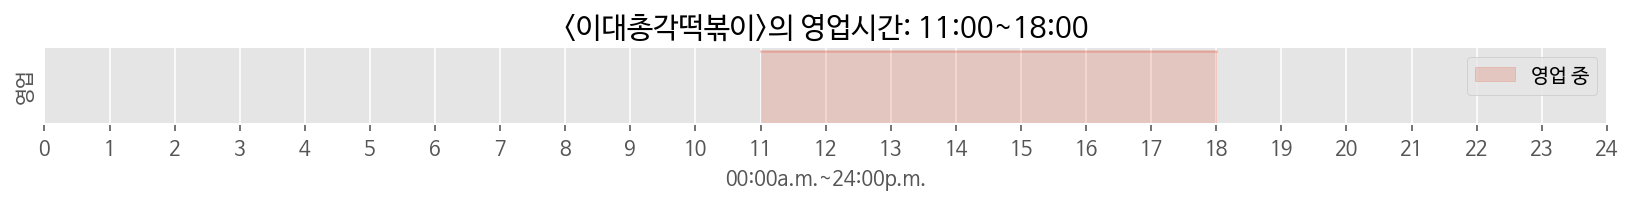


   배달 가능 여부
❗<이대총각떡볶이>은 배달이 불가능하거나 배달 여부가 표시되어 있지 않은 가게입니다❗
______________________________________________________________________________________________________________________
**********************************************************************************
3번 - 방문 정보: 음식점 요일별 방문자 수, 최다 리뷰/최고 별점 음식점 정보 시각화 모드입니다.

모드를 골라주세요
1 - 음식점 요일별 방문자수 뷰 모드, 2 - 우수 음식점 검색 모드: 2
2번: 서대문구 우수 음식점 검색 모드로 설정되었습니다.

서대문구의 행정동명은 다음과 같습니다 : 
 ['남가좌1동', '남가좌2동', '북가좌1동', '북가좌2동', '북아현동', '신촌동', '연희동', '천연동', '충현동', '홍은1동', '홍은2동', '홍제1동', '홍제2동', '홍제3동']

원하는 행정동명을 입력해주세요: 
 남가좌1동

우수 음식점을 어떻게 검색하시겠습니까?
1 - 네이버 최다리뷰수 음식점, 2 - 네이버 최고리뷰평점 음식점 , 3 - 구글 최고리뷰평점 음식점 , 4-우수 음식점 검색 모드 종료: 
3
3번: 구글 최고평점으로 우수 음식점을 검색합니다.

남가좌1동의 구글 최고리뷰평점 음식점 :  새벽집
새벽집의 최고 평점 :  5


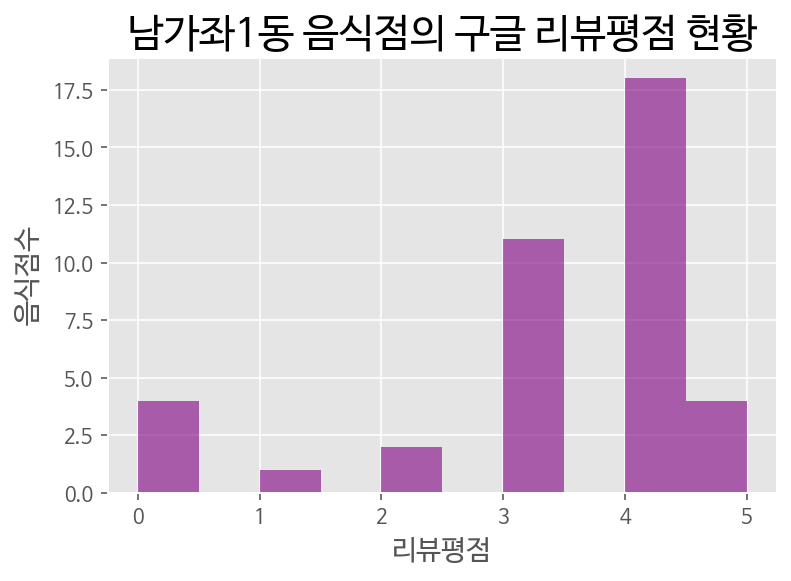

**********************************************************************************
4번 - 리뷰 시각화: 음식점 리뷰 텍스트 시각화 모드입니다.

서대문구의 행정동명은 다음과 같습니다 : 
 ['남가좌1동', '남가좌2동', '북가좌1동', '북가좌2동', '북아현동', '신촌동', '연희동', '천연동', '충현동', '홍은1동', '홍은2동', '홍제1동', '홍제2동', '홍제3동']
행정동명을 입력해주세요: 
북아현동
리뷰 말뭉치를 조회 할 식당 이름을 입력해주세요(키워드 검색): 
밥
검색하신 키워드에 맞는 식당 목록입니다.
{0: '라밥', 1: '봉구스밥버거', 2: '초밥사랑', 3: '비빔밥', 4: '김밥&국수'}
목록 중 원하시는 식당 번호를 입력해주세요: 
2


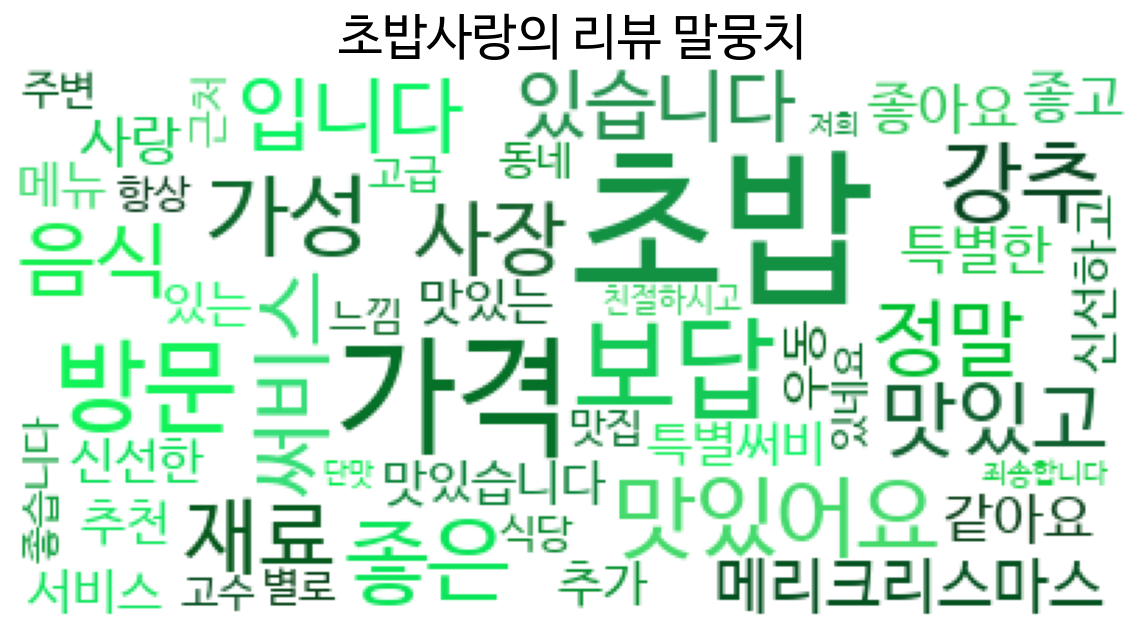

**********************************************************************************
5번 - 키워드 추천: 음식점 리뷰 키워드를 통한 추천 음식점 시각화 모드입니다.

서대문구의 행정동명은 다음과 같습니다 : 
 ['남가좌1동', '남가좌2동', '북가좌1동', '북가좌2동', '북아현동', '신촌동', '연희동', '천연동', '충현동', '홍은1동', '홍은2동', '홍제1동', '홍제2동', '홍제3동']
원하는 지역을 입력하세요:
 충현동
원하는 키워드 1: 분위기
원하는 키워드 2: 맛
원하는 키워드 3: 커피


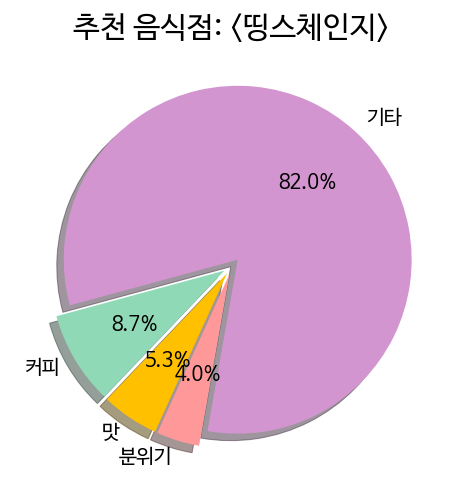

**********************************************************************************
이화여자대학교 주변 음식점 데이터 시각화 프로그램을 종료합니다.
이용해 주셔서 감사합니다.


In [ ]:

print('____________________________________________________')
print('\n이화여자대학교 주변 음식점 정보 시각화를 진행합니다.\n')
print('1번 - 위치 정보 \n')
print('2번 - 영업,배달 정보\n')
print('3번 - 방문 정보\n')
print('4번 - 리뷰 시각화 \n')
print('5번 - 키워드 추천 \n')
print('____________________________________________________')

#####음식점 위치, 리뷰 평점, 도로명 주소 정보 시각화#####

print('1번 - 위치 정보: 음식점 위치, 도로명 주소, 리뷰 평점, 나와의 거리 시각화 모드입니다.')
print()
program_1()
print('**********************************************************************************')

#####음식점 영업시간, 배달여부 시각화#####

print('2번 - 영업,배달 정보: 음식점 영업시간, 배달 유무 시각화 모드입니다. ')
print()
program_2()
print('**********************************************************************************')

#####3번 방문자 리뷰 수 정보 시각화#####

print('3번 - 방문 정보: 음식점 요일별 방문자 수, 최다 리뷰/최고 별점 음식점 정보 시각화 모드입니다.')
print()
program_3()
print('**********************************************************************************')

#####4번 리뷰텍스트 정보 말뭉치 시각화#####

print('4번 - 리뷰 시각화: 음식점 리뷰 텍스트 시각화 모드입니다.')
print()
program_4()
print('**********************************************************************************')

#####5번 리뷰텍스트 정보 파이 차트 시각화#####

print('5번 - 키워드 추천: 음식점 리뷰 키워드를 통한 추천 음식점 시각화 모드입니다.')
print()
program_5()
print('**********************************************************************************')

#####프로그램 종료#####

print('이화여자대학교 주변 음식점 데이터 시각화 프로그램을 종료합니다.')  
print('이용해 주셔서 감사합니다.')  